In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
#подготовка данных

data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t' )
fix = data.loc[data['item_price']==1.99].copy()
data.drop(index = 4509, inplace = True)
fix.item_price = 2.15
data = pd.concat([data,fix],ignore_index=True, axis=0)

In [3]:
#1. Вывести: кол-во наблюдений в датасете

size = data.shape[0]
print(size)

4621


In [4]:
#2. Вывести названия столбцов

for col in data.columns:
    print(col)

order_id
quantity
item_name
choice_description
item_price


In [5]:
#3. Определить самую частую позицию (item) в заказе

data['item_name'].value_counts().idxmax()

'Chicken Bowl'

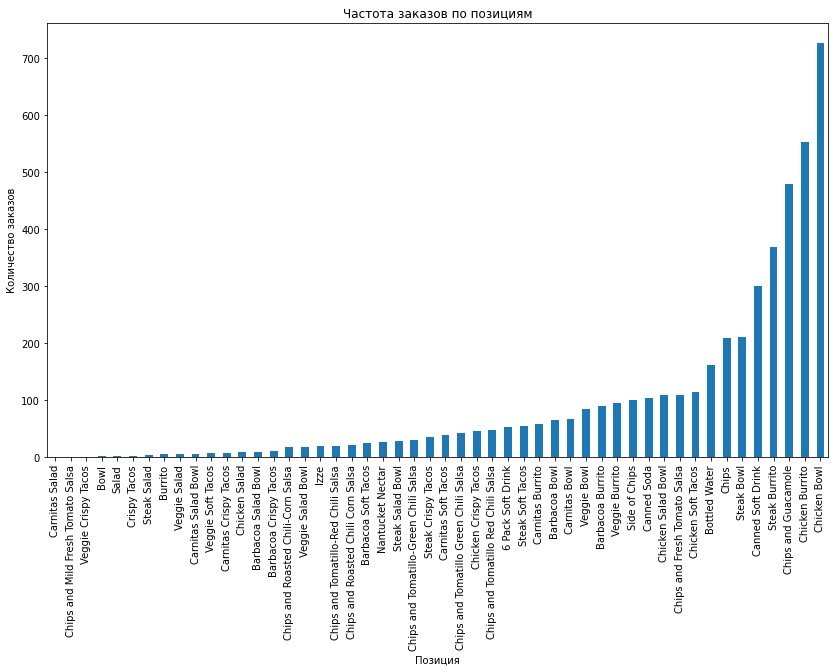

In [7]:
#4. Построить гистрограмму частоты заказов по позициям (item)

items = Counter(data.item_name)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)
srs.plot(kind='bar', figsize=(14, 8))
plt.title('Частота заказов по позициям')
plt.xlabel('Позиция')
plt.ylabel('Количество заказов')
plt.show()

In [6]:
#5. Измените тип переменной item_price с помощью лямбды функции

data['item_price'] = data.apply(lambda x: float(x['item_price'].replace('$', '')),axis=1)
data.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


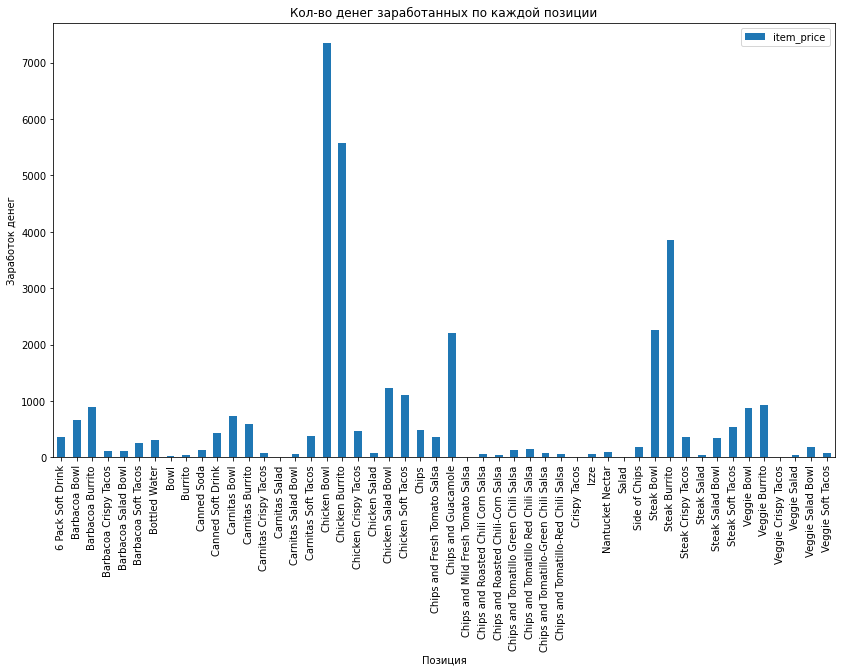

In [8]:
#6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)

srs = data[['item_name', 'item_price']]
srs = srs.groupby('item_name').sum()
srs.plot(kind='bar', figsize=(14, 8))
plt.title('Кол-во денег заработанных по каждой позиции')
plt.xlabel('Позиция')
plt.ylabel('Заработок денег')
plt.show()

In [9]:
#7. Средняя сумма заказа? (минимум 2 способа)

# первый способ
print('Средняя сумма заказа первым способом')
print(data['item_price'].sum() / data['order_id'].max())
print()
# второй способ
print('Средняя сумма заказа вторым способом')
data.groupby('order_id')['item_price'].sum().mean()


Средняя сумма заказа первым способом
18.81034351145038

Средняя сумма заказа вторым способом


18.8103435114505

In [10]:
#8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе

data.groupby('order_id').agg(['mean','min','max','median'])

quantity                item_price                      
             mean min max median       mean    min    max  median
order_id                                                         
1             1.0   1   1    1.0   2.890000   2.39   3.39   2.890
2             2.0   2   2    2.0  16.980000  16.98  16.98  16.980
3             1.0   1   1    1.0   6.335000   1.69  10.98   6.335
4             1.0   1   1    1.0  10.500000   9.25  11.75  10.500
5             1.0   1   1    1.0   6.850000   4.45   9.25   6.850
...           ...  ..  ..    ...        ...    ...    ...     ...
1830          1.0   1   1    1.0  11.500000  11.25  11.75  11.500
1831          1.0   1   1    1.0   4.300000   1.50   9.25   2.150
1832          1.0   1   1    1.0   6.600000   4.45   8.75   6.600
1833          1.0   1   1    1.0  11.750000  11.75  11.75  11.750
1834          1.0   1   1    1.0   9.583333   8.75  11.25   8.750

[1834 rows x 8 columns]

In [32]:
#9. Определить статистику заказов стейков

steak = data.loc[data['item_name'].str.contains('Steak')]
steak.groupby('item_name')['quantity'].sum()

item_name
Steak Bowl            221
Steak Burrito         386
Steak Crispy Tacos     36
Steak Salad             4
Steak Salad Bowl       31
Steak Soft Tacos       56
Name: quantity, dtype: int64

In [31]:
# Определить статистику заказов прожарки

sauces = steak[steak['choice_description'].str.rfind('Salsa') != -1]
mild = sauces[sauces['choice_description'].str.rfind('(Mild)') != -1] #слабый соус
medium = sauces[sauces['choice_description'].str.rfind('(Medium)') != -1] #средний соус
hot = sauces[sauces['choice_description'].str.rfind('(Hot)') != -1] #острый соус
print('Заказано стейков:',steak['quantity'].sum() )
print('Из них',mild['quantity'].sum(),'с слабым соусом,',medium['quantity'].sum(),'с средним соусом,',hot['quantity'].sum(),'с острым соусом.' )

Заказано стейков: 734
Из них 96 с слабым соусом, 115 с средним соусом, 84 с острым соусом.


In [15]:
#10. Добавить новый столбец цен на каждую позицию в заказе в рублях

rub_rate = 72.5
data['item_price_rub'] = round(data.item_price * rub_rate, 2)
data.head(5)

,order_id,quantity,item_name,choice_description,item_price,item_price_rub
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,173.28
1,1,1,Izze,[Clementine],3.39,245.78
2,1,1,Nantucket Nectar,[Apple],3.39,245.78
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,173.28
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1231.05


In [13]:
#11. Сгруппировать заказы по входящим позициям в него. 

group_orders = data.groupby('order_id').agg({'item_name': lambda data: ", ".join(data), 'item_price':np.sum,'quantity':np.sum}).reset_index()
group_orders.head(5)

,order_id,item_name,item_price,quantity
0,1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
1,2,Chicken Bowl,16.98,2
2,3,"Chicken Bowl, Side of Chips",12.67,2
3,4,"Steak Burrito, Steak Soft Tacos",21.00,2
4,5,"Steak Burrito, Chips and Guacamole",13.70,2


In [14]:
#Отдельно сгруппировать по стейкам во всех видах прожарках

group_steak = steak.groupby('order_id',).agg({'item_name': lambda data: ", ".join(data), 'item_price':np.sum, 'quantity':np.sum}).reset_index()
group_steak

,order_id,item_name,item_price,quantity
0,4,"Steak Burrito, Steak Soft Tacos",21.00,2
1,5,Steak Burrito,9.25,1
2,16,Steak Burrito,8.99,1
3,20,Steak Burrito,11.75,1
4,21,Steak Burrito,8.99,1
...,...,...,...,...
607,1810,Steak Crispy Tacos,11.75,1
608,1818,Steak Salad Bowl,9.39,1
609,1829,Steak Burrito,11.75,1
610,1830,Steak Burrito,11.75,1


In [ ]:
#12. Определить цену по каждой позиции в отдельности
